<a href="https://colab.research.google.com/github/Rahulappu2004/Fake-Account-Detection-in-Twitter-X/blob/main/SVM_NN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn tensorflow


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
df=pd.read_csv('/content/twitter_data (1).csv')
df.head()

,UserID,No Of Abuse Report,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
0,1,37,415,204,290,838,26,53,1
1,2,63,383,542,652,349,37,58,1
2,3,10,151,244,863,271,73,11,1
3,4,83,54,604,496,937,37,55,1
4,5,47,834,326,401,928,80,78,1


In [ ]:
print("Missing values per column:\n", df.isnull().sum())

# Handle missing values if any
df.fillna(df.mean(), inplace=True)

# Convert categorical columns (if any) to numeric
if 'Fake Or Not Category' in df.columns:
    encoder = LabelEncoder()
    df['Fake Or Not Category'] = encoder.fit_transform(df['Fake Or Not Category'])

# Separate features and target variable
X = df.drop('Fake Or Not Category', axis=1)
y = df['Fake Or Not Category']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Missing values per column:
 UserID                                         0
No Of Abuse Report                             0
No Of Rejected Friend Requests                 0
No Of Freind Requests Thar Are Not Accepted    0
No Of Friends                                  0
No Of Followers                                0
No Of Likes To Unknown Account                 0
No Of Comments Per Day                         0
Fake Or Not Category                           0
dtype: int64


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Train an SVM model to extract features
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Extract features from the SVM decision function
X_train_svm_features = svm.decision_function(X_train).reshape(-1, 1)
X_test_svm_features = svm.decision_function(X_test).reshape(-1, 1)


In [ ]:
# Define a simple neural network
model = Sequential([
    Dense(128, input_dim=1, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_svm_features, y_train, epochs=20, batch_size=32, validation_data=(X_test_svm_features, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7596 - loss: 0.4983 - val_accuracy: 0.9650 - val_loss: 0.1220
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9646 - loss: 0.1337 - val_accuracy: 0.9650 - val_loss: 0.0904
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9554 - loss: 0.1088 - val_accuracy: 0.9650 - val_loss: 0.0867
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9611 - loss: 0.1042 - val_accuracy: 0.9650 - val_loss: 0.0881
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9572 - loss: 0.1011 - val_accuracy: 0.9650 - val_loss: 0.0882
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9662 - loss: 0.0859 - val_accuracy: 0.9650 - val_loss: 0.0882
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9489 - loss: 0.1113 - val_accuracy: 0.9650 - val_loss: 0.0887
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9588 - loss: 0.0902 - val_accuracy: 0.9650 - val_loss

In [ ]:
# Predict on the test set
y_pred_prob = model.predict(X_test_svm_features)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Accuracy: 0.96
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


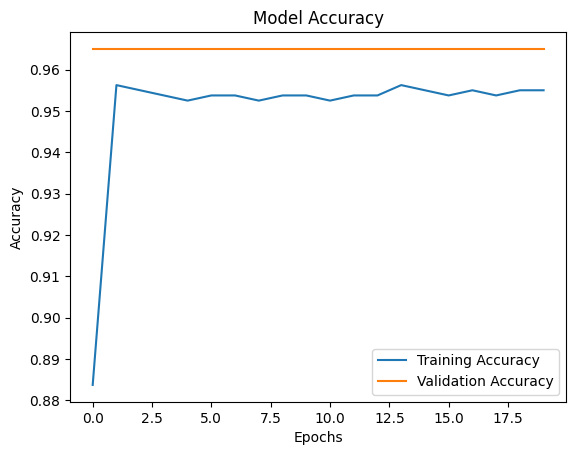

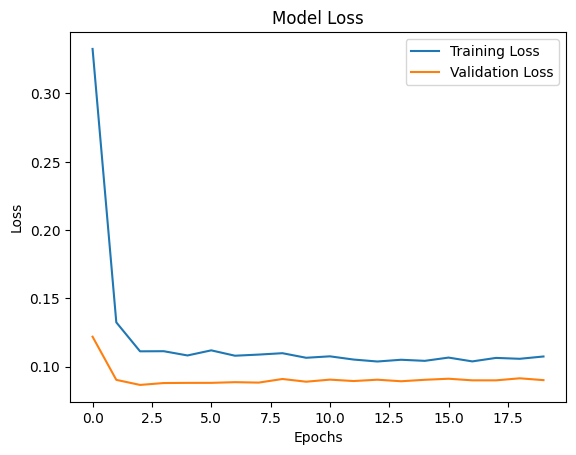

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
